In [30]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

In [31]:
#loading the data
online_shopping_path = "../starter_code/online_shopping.csv"

In [32]:
#importing the .csv
shopping_data = pd.read_csv(online_shopping_path)


In [33]:
#previewing the data
shopping_data.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [34]:
# looking at the .info for null values and dtypes
shopping_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [35]:
# getting the column headings to use for analysis
print(shopping_data.columns)

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')


In [36]:
#dropping the unnamed column
clean_shopping_df = shopping_data.drop('Unnamed: 0', axis=1, inplace=False)
clean_shopping_df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [37]:
#dropping the product SKU column
clean_shopping_df = shopping_data.drop('Product_SKU', axis=1, inplace=False)
clean_shopping_df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [38]:
#dropping remaining null values
clean_shopping_df = clean_shopping_df.dropna(axis=0, how="any")
clean_shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52524 non-null  int64  
 1   CustomerID           52524 non-null  float64
 2   Gender               52524 non-null  object 
 3   Location             52524 non-null  object 
 4   Tenure_Months        52524 non-null  float64
 5   Transaction_ID       52524 non-null  float64
 6   Transaction_Date     52524 non-null  object 
 7   Product_Description  52524 non-null  object 
 8   Product_Category     52524 non-null  object 
 9   Quantity             52524 non-null  float64
 10  Avg_Price            52524 non-null  float64
 11  Delivery_Charges     52524 non-null  float64
 12  Coupon_Status        52524 non-null  object 
 13  GST                  52524 non-null  float64
 14  Date                 52524 non-null  object 
 15  Offline_Spend        52524 non-null 

In [39]:
#looking at product counts
clean_shopping_df.Product_Category.value_counts()

Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: Product_Category, dtype: int64

In [40]:
#coupon status counts
clean_shopping_df.Coupon_Status.value_counts()

Clicked     26720
Used        17778
Not Used     8026
Name: Coupon_Status, dtype: int64

In [41]:
clean_shopping_df.Coupon_Code.value_counts()

SALE20     6373
SALE30     5915
SALE10     5838
ELEC10     4826
ELEC30     4647
ELEC20     4540
EXTRA10    2317
OFF10      2250
EXTRA20    2211
OFF20      2202
OFF30      2061
EXTRA30    2047
NE30       1003
NE20        740
AIO10       654
AIO20       618
AIO30       610
NE10        455
NJ20        299
NJ10        280
HGEAR10     267
HGEAR20     267
HGEAR30     237
WEMP20      205
WEMP30      185
NJ30        170
WEMP10      164
NCA10       116
NCA30       110
BT10         98
ACC20        97
NCA20        91
GC10         89
BT30         87
BT20         83
ACC30        77
ACC10        60
HOU20        50
HOU10        42
GC20         41
HOU30        30
GC30         29
AND30        16
AND10        14
AND20        13
Name: Coupon_Code, dtype: int64

In [42]:
#gender value counts
clean_shopping_df.Gender.value_counts()

F    32767
M    19757
Name: Gender, dtype: int64

In [43]:
#location value counts
clean_shopping_df.Location.value_counts()

Chicago          18240
California       16008
New York         11097
New Jersey        4470
Washington DC     2709
Name: Location, dtype: int64

In [44]:
# convert date to month, day, year
clean_shopping_df["Transaction_Date"] = pd.to_datetime(clean_shopping_df["Transaction_Date"])
clean_shopping_df["Transaction_Date"] = clean_shopping_df["Transaction_Date"].dt.strftime("%m-%d-%Y")
clean_shopping_df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,01-01-2019,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,01-01-2019,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [45]:
clean_shopping_df.tail()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
52919,52919,13155.0,F,California,8.0,22504.0,03-10-2019,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,3/10/2019,2500.0,1294.22,3,GC30,30.0
52920,52920,18077.0,M,Chicago,34.0,24250.0,03-28-2019,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,3/28/2019,2000.0,1066.12,3,GC30,30.0
52921,52921,16085.0,M,California,15.0,39991.0,10-06-2019,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0
52922,52922,16085.0,M,California,15.0,39991.0,10-06-2019,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0
52923,52923,13659.0,F,Chicago,8.0,39998.0,10-06-2019,Google Spiral Journal with Pen,Notebooks & Journals,1.0,5.59,6.5,Not Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0


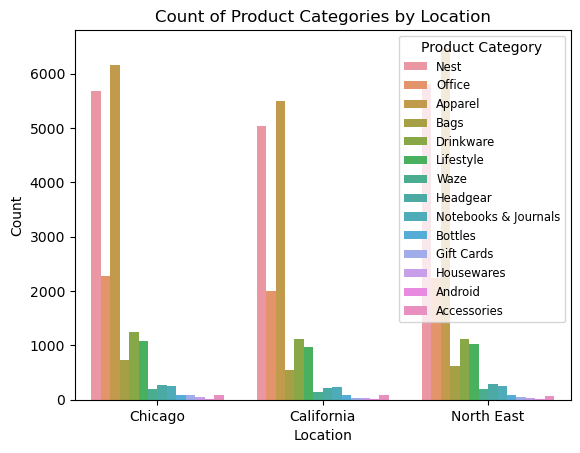

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the count of Product_Category for each Location
sns.countplot(data=clean_shopping_df, x='Location', hue='Product_Category')
# Adding labels and title for better readability
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of Product Categories by Location')
plt.legend(title='Product Category')
plt.legend(title='Product Category', loc='best', fontsize='small')

# Display the plot
plt.show()




<Figure size 1000x600 with 0 Axes>

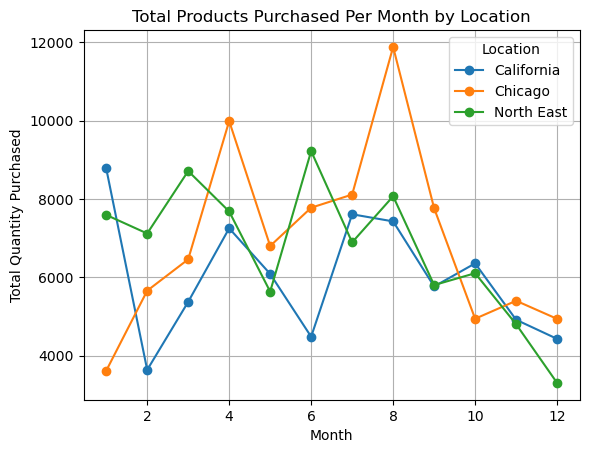

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Ensure the 'Transaction_Date' column is in datetime format
clean_shopping_df['Transaction_Date'] = pd.to_datetime(clean_shopping_df['Transaction_Date'])

# Step 2: Create a new column for the month
clean_shopping_df['Month'] = clean_shopping_df['Transaction_Date'].dt.month

# Step 3: Aggregate data to get total products purchased per month for each location
monthly_sales_by_location = clean_shopping_df.groupby(['Month', 'Location'])['Quantity'].sum().unstack()

# Step 4: Plotting the data
plt.figure(figsize=(10, 6))
monthly_sales_by_location.plot(kind='line', marker='o')
plt.title('Total Products Purchased Per Month by Location')
plt.xlabel('Month')
plt.ylabel('Total Quantity Purchased')
plt.grid(True)
plt.legend(title='Location')
plt.show()

TypeError: 'Axes' object is not iterable

<Figure size 1200x700 with 0 Axes>

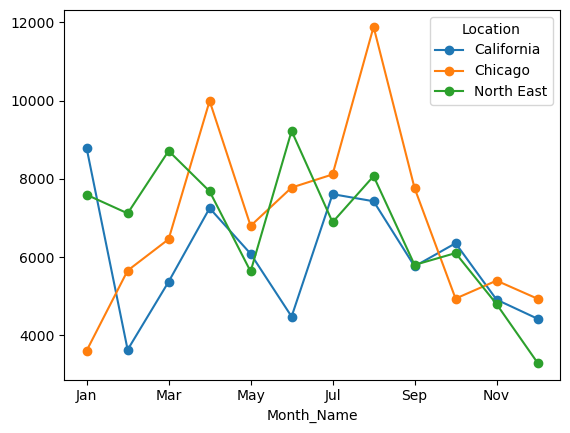

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Ensure the 'Transaction_Date' column is in datetime format
clean_shopping_df['Transaction_Date'] = pd.to_datetime(clean_shopping_df['Transaction_Date'])

# Step 2: Create a new column for the month name
clean_shopping_df['Month_Name'] = clean_shopping_df['Transaction_Date'].dt.strftime('%b')  # %b gives the abbreviated month name

# Step 3: Aggregate data to get total products purchased per month for each location
monthly_sales_by_location = clean_shopping_df.groupby(['Month_Name', 'Location'])['Quantity'].sum().unstack()

# Sorting the data based on Month to ensure it appears in chronological order
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_sales_by_location = monthly_sales_by_location.loc[months_order]

# Step 4: Plotting the data with data labels
plt.figure(figsize=(12, 7))
lines = monthly_sales_by_location.plot(kind='line', marker='o')

# Adding data labels
for line in lines:
    for x, y in enumerate(line.get_data()[1]):  # get_data() returns a tuple of x and y data
        plt.text(x, y, f'{y:.0f}', color=line.get_color(), fontsize=8, va='bottom')

plt.title('Total Products Purchased Per Month by Location')
plt.xlabel('Month')
plt.ylabel('Total Quantity Purchased')
plt.grid(True)
plt.legend(title='Location')
plt.show()

<Figure size 1600x800 with 0 Axes>

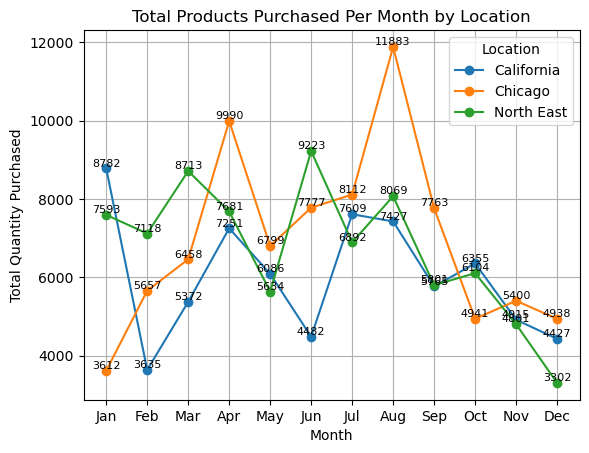

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Ensure the 'Transaction_Date' column is in datetime format
clean_shopping_df['Transaction_Date'] = pd.to_datetime(clean_shopping_df['Transaction_Date'])

# Step 2: Create a new column for the month name
clean_shopping_df['Month_Name'] = clean_shopping_df['Transaction_Date'].dt.strftime('%b')  # %b gives the abbreviated month name

# Step 3: Aggregate data to get total products purchased per month for each location
monthly_sales_by_location = clean_shopping_df.groupby(['Month_Name', 'Location'])['Quantity'].sum().unstack()

# Sorting the data based on Month to ensure it appears in chronological order
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_sales_by_location = monthly_sales_by_location.reindex(months_order)

# Step 4: Plotting the data with data labels
plt.figure(figsize=(16, 8))
ax = monthly_sales_by_location.plot(kind='line', marker='o')

# Adding data labels
for i, line in enumerate(ax.get_lines()):
    for x, y in enumerate(line.get_ydata()):
        if pd.notna(y):  # This checks if the data point is not NaN
            plt.text(x, y, f'{y:.0f}', color="black", fontsize=8, va='bottom', ha='center')

plt.title('Total Products Purchased Per Month by Location')
plt.xlabel('Month')
plt.ylabel('Total Quantity Purchased')
plt.grid(True)
plt.legend(title='Location')
plt.xticks(ticks=range(len(months_order)), labels=months_order)  # Setting custom x-axis labels
plt.show()






In [46]:
#combining new york and new jersy into one group
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"New York": "New Jersey"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of Chicago          18240
California       16008
New Jersey       15567
Washington DC     2709
Name: Location, dtype: int64>

In [47]:
#combining washington DC and the new jersey group
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"New Jersey": "Washington DC"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of Washington DC    18276
Chicago          18240
California       16008
Name: Location, dtype: int64>

In [48]:
#renaming the group to northeast
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"Washington DC": "North East"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of North East    18276
Chicago       18240
California    16008
Name: Location, dtype: int64>

In [49]:
#combining nest canada and nest usa
clean_shopping_df["Product_Category"] = clean_shopping_df.Product_Category.replace({"Nest-Canada": "Nest-USA"})
clean_shopping_df.Product_Category.value_counts().head

<bound method NDFrame.head of Apparel                 18126
Nest-USA                14330
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: Product_Category, dtype: int64>

In [50]:
#grouping all the nest categories together
clean_shopping_df["Product_Category"] = clean_shopping_df.Product_Category.replace({"Nest-USA": "Nest"})
clean_shopping_df.Product_Category.value_counts().head

<bound method NDFrame.head of Apparel                 18126
Nest                    16528
Office                   6513
Drinkware                3483
Lifestyle                3092
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: Product_Category, dtype: int64>

In [51]:
#NORTH EAST DATA
north_east_data = clean_shopping_df.loc[clean_shopping_df["Location"] == "North East"]
north_east_data.Product_Category.value_counts().head

<bound method NDFrame.head of Apparel                 6477
Nest                    5806
Office                  2247
Drinkware               1114
Lifestyle               1029
Bags                     612
Headgear                 286
Notebooks & Journals     251
Waze                     205
Bottles                   92
Accessories               68
Gift Cards                43
Housewares                34
Android                   12
Name: Product_Category, dtype: int64>

In [55]:
# class v / s fare barplot
sns.barplot(x = "Location", y = "Product_Category", data = clean_shopping_df)
# Show the plot
plt.show()




TypeError: Neither the `x` nor `y` variable appears to be numeric.